In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os

In [2]:

# Lets Read Images of Expression
face_img0 = cv2.imread("C:/Users/dell/Downloads/Image/face_expression_images/train/angry/120.jpg")
face_img1 = cv2.imread("C:/Users/dell/Downloads/Image/face_expression_images/train/disgust/299.jpg")
face_img2 = cv2.imread("C:/Users/dell/Downloads/Image/face_expression_images/train/fear/2.jpg")
face_img3 = cv2.imread("C:/Users/dell/Downloads/Image/face_expression_images/train/happy/7.jpg")
face_img4 = cv2.imread("C:/Users/dell/Downloads/Image/face_expression_images/train/neutral/4.jpg")
face_img5 = cv2.imread("C:/Users/dell/Downloads/Image/face_expression_images/train/sad/3.jpg")
face_img6 = cv2.imread("C:/Users/dell/Downloads/Image/face_expression_images/train/surprise/15.jpg")

In [3]:
faces = [face_img0, face_img1, face_img2, face_img3, face_img4, face_img5, face_img6]
facial_expressions = ['angry','disgust','fear','happy','neutral','sad','surprise']

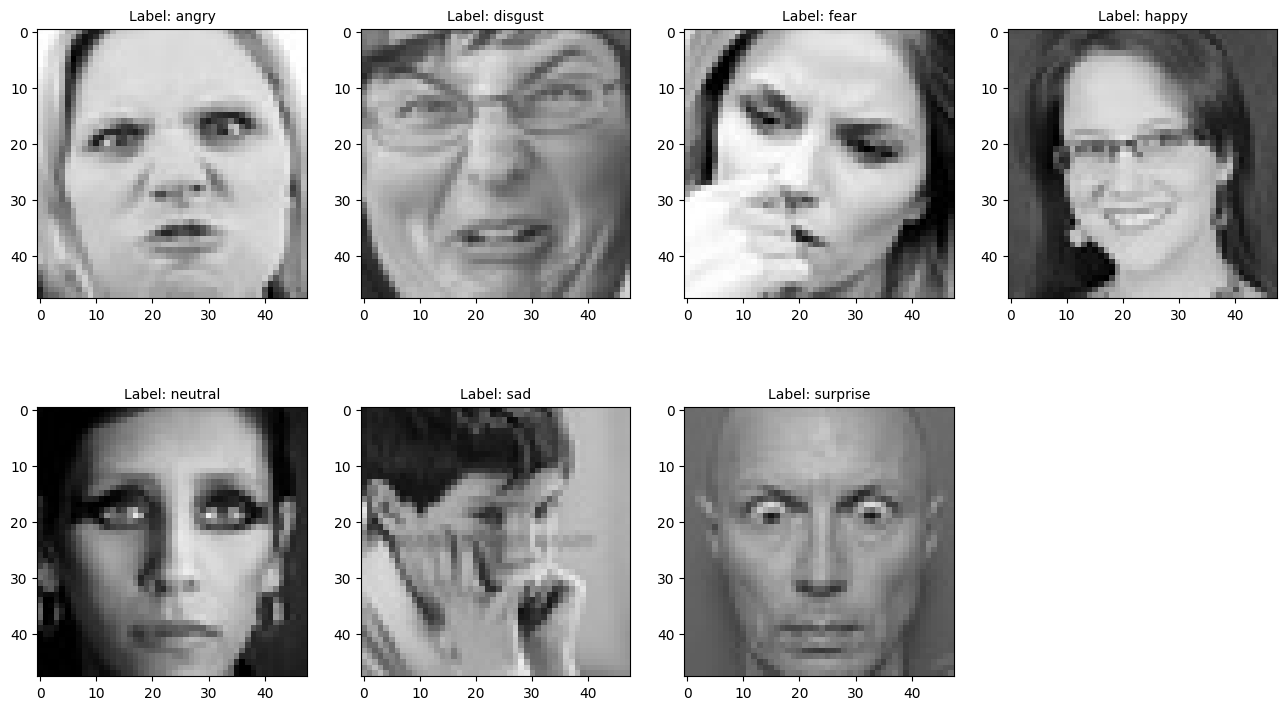

In [4]:
fig = plt.figure(figsize = (16,9))
for index, (image,label) in enumerate(zip(faces [:], facial_expressions[:])):
    plt.subplot(2, 4, index + 1)
    plt.imshow(image, cmap = 'gray')
    plt.title('Label: %s' %label, fontsize = 10)
plt.show()

In [5]:
face_img1.shape

(48, 48, 3)

#### image Data Augmentation
    * All RGB Image Data will be used to create new samples for training.
    * New Sample will be transformed using Image Data Generator.
    * Here, Images will be resampled using pixel normalization (Divide each pixel value by 255), add transformation like , shear, zoom, brightness, flip, rotation etc.


In [6]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from numpy import expand_dims

In [7]:
# image Pixel Normalization
# Train Image Datagenerator
# 1./255 => Image Pixel Scaling
train_datagen = ImageDataGenerator(rescale= 1./255, 
                                   rotation_range=20, 
                                   zoom_range=0.2,
                                   horizontal_flip=True,fill_mode='nearest')

In [8]:
# Test Image Data Generator
test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
# Reshaping all images to new shape of (150 x 150), 
# batch_size = 16 (num of images trained in each iteration)
training_set = train_datagen.flow_from_directory('C:/Users/dell/Downloads/Image/face_expression_images/train/', target_size=(64,64),
                                                batch_size=32, class_mode='categorical')
test_set = test_datagen.flow_from_directory('C:/Users/dell/Downloads/Image/face_expression_images/validation/', target_size=(64,64),
                                                batch_size=32, class_mode='categorical')

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [10]:
training_set.image_shape

(64, 64, 3)

In [11]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [12]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
# To build a Sequential (Feed Forward NN) or CNN Model
from tensorflow.keras.models import Sequential
# Optimizers - To minimize error by optimizing parameters (weights & biases)
from tensorflow.keras.optimizers import Adam


In [13]:
def build_model():
    model = Sequential()
    # ConvNet Layer - I
    # Filter = Number of Filters(2^n), padding = zero_padding, kernel_shape = (3x3) matrix
    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu',
                    input_shape = (64,64,3)))
    # Maxpooling
    model.add(MaxPooling2D())
    
    # ConvNet Layer - II
    model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    # Maxpooling
    model.add(MaxPooling2D())
    
    # ConvNet Layer - III
    model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    # Maxpooling
    model.add(MaxPooling2D())
    
    # ConvNet Layer - III
    model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    # Maxpooling
    model.add(MaxPooling2D())
    
    # Flatten
    model.add(Flatten())
    # Fully Connected Neural Network (FC-Layer)
    model.add(Dense(units = 128, activation='relu'))
    # units = num of classes in multi-class classification
    model.add(Dense(units = 7, activation = 'softmax'))
    
    # Learning Rate (alpha = (0.0001 - 1) & optimizers = 'Adam')
    adam_optimizer = Adam(learning_rate= 0.001)
    
    # Loss - binary_crossentropy, classification_metrics = 'accuracy'
    model.compile(loss = 'categorical_crossentropy', optimizer = adam_optimizer, metrics = ['accuracy'])
    
    return model

In [14]:
model = build_model()

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 256)        0

In [16]:
# save best model 
from tensorflow.keras import callbacks
filepath = "C:/Users/dell/Downloads/Image/Mask_Expression_Model.hdf5"

In [17]:
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True,
                                       mode = 'min', verbose = 1)

In [18]:
checkpoint


In [19]:
import datetime
import tensorflow
# Saves Training Process & Performances
logdir = os.path.join("C:/Users/dell/Downloads/Image/face_expression.logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(logdir)

In [20]:
# epochs = Num of Iterations, shuffle = True
# history = model.fit_generator(generator = training_set, validation_data= test_set, epochs=30, 
                   shuffle=True, callbacks=[checkpoint, tensorboard_callback], verbose = 1)

C:\Users\dell\AppData\Local\Temp\ipykernel_19860\2635530260.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = training_set, validation_data= test_set, epochs=30,


Epoch 1/30
901/901 [==============================] - ETA: 0s - loss: 1.7980 - accuracy: 0.2536
Epoch 1: val_loss improved from inf to 1.75100, saving model to C:/Users/dell/Downloads/Image\Mask_Expression_Model.hdf5
901/901 [==============================] - 724s 803ms/step - loss: 1.7980 - accuracy: 0.2536 - val_loss: 1.7510 - val_accuracy: 0.2804
Epoch 2/30
901/901 [==============================] - ETA: 0s - loss: 1.6623 - accuracy: 0.3348
Epoch 2: val_loss improved from 1.75100 to 1.51261, saving model to C:/Users/dell/Downloads/Image\Mask_Expression_Model.hdf5
901/901 [==============================] - 347s 385ms/step - loss: 1.6623 - accuracy: 0.3348 - val_loss: 1.5126 - val_accuracy: 0.4192
Epoch 3/30
901/901 [==============================] - ETA: 0s - loss: 1.5144 - accuracy: 0.4087
Epoch 3: val_loss improved from 1.51261 to 1.37765, saving model to C:/Users/dell/Downloads/Image\Mask_Expression_Model.hdf5
901/901 [==============================] - 357s 396ms/step - loss: 1.51

Epoch 26/30
901/901 [==============================] - ETA: 0s - loss: 1.0404 - accuracy: 0.6064
Epoch 26: val_loss did not improve from 1.07512
901/901 [==============================] - 375s 416ms/step - loss: 1.0404 - accuracy: 0.6064 - val_loss: 1.1108 - val_accuracy: 0.5921
Epoch 27/30
901/901 [==============================] - ETA: 0s - loss: 1.0385 - accuracy: 0.6063
Epoch 27: val_loss did not improve from 1.07512
901/901 [==============================] - 350s 388ms/step - loss: 1.0385 - accuracy: 0.6063 - val_loss: 1.1280 - val_accuracy: 0.5868
Epoch 28/30
901/901 [==============================] - ETA: 0s - loss: 1.0254 - accuracy: 0.6113
Epoch 28: val_loss did not improve from 1.07512
901/901 [==============================] - 362s 402ms/step - loss: 1.0254 - accuracy: 0.6113 - val_loss: 1.1008 - val_accuracy: 0.5952
Epoch 29/30
901/901 [==============================] - ETA: 0s - loss: 1.0377 - accuracy: 0.6091
Epoch 29: val_loss did not improve from 1.07512
901/901 [======

In [20]:
model.load_weights('C:/Users/dell/Downloads/Image/Mask_Expression_Model.hdf5')

In [21]:
img_new = cv2.imread("C:/Users/dell/Downloads/Image/face_expression_images/train/angry/22.jpg")


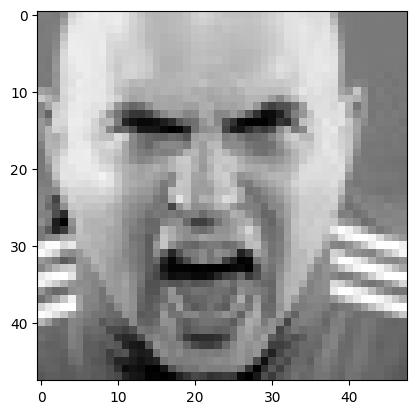

In [22]:
plt.imshow(img_new)

In [23]:
img_new = cv2.resize(img_new, (64,64))

In [24]:
img_new.shape

(64, 64, 3)

In [25]:
b, g, r = cv2.split(img_new)

In [26]:
img_new = cv2.merge([r, g, b])
img_new

array([[[125, 125, 125],
        [125, 125, 125],
        [124, 124, 124],
        ...,
        [122, 122, 122],
        [122, 122, 122],
        [122, 122, 122]],

       [[124, 124, 124],
        [124, 124, 124],
        [124, 124, 124],
        ...,
        [121, 121, 121],
        [121, 121, 121],
        [121, 121, 121]],

       [[123, 123, 123],
        [124, 124, 124],
        [125, 125, 125],
        ...,
        [121, 121, 121],
        [121, 121, 121],
        [121, 121, 121]],

       ...,

       [[ 97,  97,  97],
        [ 98,  98,  98],
        [ 98,  98,  98],
        ...,
        [ 99,  99,  99],
        [ 95,  95,  95],
        [ 91,  91,  91]],

       [[ 92,  92,  92],
        [ 95,  95,  95],
        [ 97,  97,  97],
        ...,
        [ 95,  95,  95],
        [ 92,  92,  92],
        [ 89,  89,  89]],

       [[ 88,  88,  88],
        [ 92,  92,  92],
        [ 94,  94,  94],
        ...,
        [ 94,  94,  94],
        [ 91,  91,  91],
        [ 89,  89,  89]]

In [27]:
X_new = img_new.astype("float32")
X_new /= 255

In [28]:
X_new = X_new.reshape(1, 64, 64, 3)

In [29]:
model.predict(X_new)

1/1 [==============================] - 0s 466ms/step


array([[9.8375720e-01, 9.7557239e-04, 1.1132650e-02, 1.0746090e-03,
        8.5168792e-04, 1.3480956e-03, 8.6030638e-04]], dtype=float32)

In [30]:
np.argmax(model.predict(X_new))

1/1 [==============================] - 0s 33ms/step


0

In [31]:
from tensorflow.keras.preprocessing import image

In [32]:
model.load_weights('C:/Users/dell/Downloads/Image/Mask_Expression_Model.hdf5')

In [33]:
color_dict={0:(0,255,0),1:(255,0,0),2:(153,0,153),3:(0,0,255),4:(125,125,125),5:(147,20,255),6:(255,0,255)}

In [34]:
cap=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier('C:/Users/dell/Downloads/Image/haarcascade_frontalface_default.xml')

In [37]:
while cap.isOpened():
    _,img=cap.read()
    face=face_cascade.detectMultiScale(img,scaleFactor=1.3,minNeighbors=5)
    for(x,y,w,h) in face:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg',face_img)
        test_image=image.load_img('temp.jpg',target_size=(64,64,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis=0)
        pred=model.predict(test_image)[0][0]
        if pred==0:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'Angry',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
        elif pred==1:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'Disgust',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
        elif pred==2:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'Fear',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
        elif pred==3:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'Happy',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
        elif pred==4:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'Neutral',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
        elif pred==5:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'Sad',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
        elif pred==6:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'Surprise',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
            
        datet=str(datetime.datetime.now())
        cv2.putText(img,datet,(400,450),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)
          
    cv2.imshow('img',img)
    
    if cv2.waitKey(1)==ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 60ms/step
